In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
wider_20p5 = np.load('Run_040118/bolp_20p5_um_0_wider.npz')

In [3]:
wider_20p5.files

['i', 'func_all', 'param']

In [4]:
Npert = 5000

In [5]:
p0_20p5 = np.array((1.19652,13.59169,0.18536,11.20134,12.25470,0.,0.))
dp_range = np.array((0.11,0.4,0.225,0.9,0.2,1.,1.))

In [6]:
def poly(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

In [7]:
def fit_poly_derivative(param,func,p0,ip,jf,n,plot=0):
    a,b,c,d = np.polyfit(param,func,3)
    slope0 = 3*a*p0**2+2*b*p0+c
    if plot:
        plt.figure()
        plt.plot(param,func,'b.',alpha=0.02)
        prange = np.linspace(min(param),max(param),100)
        plt.plot(prange,poly(prange,a,b,c,d),'r-')
        plt.axvline(p0,linestyle=':',color='grey')
        plt.title(slope0)
        plt.savefig(str('Run_040118/bolp20p5_wider_test'+'/p{}f{}_{}').format(ip,jf,n))
        plt.close()
    return slope0

In [8]:
poly_deriv = np.zeros((7,160,100))

In [9]:
for i in range(7):
    param = wider_20p5['param'][i*Npert:i*Npert+Npert,i]
    func = wider_20p5['func_all'][i*Npert:i*Npert+Npert]
    p0 = p0_20p5[i]
    for j in range(160):
        print j
        funcj = func[:,j]
        for n in range(100):
            idx = np.random.choice(5000,(50+50*n),replace=0)
            poly_deriv[i,j,n] = fit_poly_derivative(param[idx],funcj[idx],p0,i,j,n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144


In [10]:
for i in range(7):
    for j in range(160):
        plt.figure()
        plt.plot(np.arange(1,101)*50,poly_deriv[i,j]/poly_deriv[i,j,-1])
        plt.axhline(1,linestyle=':',color='grey')
        plt.ylim((0,2))
        plt.savefig(str('Run_040118/bolp20p5_wider_test'+'/p{}f{}').format(i,j))
        plt.close()

In [15]:
for i in range(7):
    param = wider_20p5['param'][i*Npert:i*Npert+Npert,i]
    func = wider_20p5['func_all'][i*Npert:i*Npert+Npert]
    p0 = p0_20p5[i]
    for j in range(160):
        funcj = func[:,j]
        fit_poly_derivative(param,funcj,p0,i,j,'all',plot=1)

In [16]:
import halotools

from halotools.sim_manager import CachedHaloCatalog

halocat = CachedHaloCatalog(simname='bolplanck',version_name='halotools_v0p4',redshift=0,halo_finder='rockstar')

from HOD_models import decorated_hod_model


model = decorated_hod_model()

model.populate_mock(halocat)

In [17]:
param_names = ('alpha','logM1','sigma_logM','logM0','logMmin','mean_occupation_centrals_assembias_param1','mean_occupation_satellites_assembias_param1')

In [27]:
p_for_ngal = np.zeros((7,51))
ngal = np.zeros((7,51))
for i in range(7):
    print i
    p = p0_20p5*1.
    for j in range(51):
        p[i] = max(p0_20p5[i]-dp_range[i]+j*dp_range[i]/25.,0)
        print j
        p_for_ngal[i,j] = p[i]
        model.param_dict.update(dict(zip(param_names, p)))
        ngal[i,j] = ((np.sum(model.mean_occupation_centrals(table=model.mock.halo_table))+\
                np.sum(model.mean_occupation_satellites(table=model.mock.halo_table)))/(250.**3))

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


-0.00021936537731 -0.000218356238243 1.00462152616
-0.00174422609897 -0.00174491058925 0.999607721865
0.00103272335159 0.00103053575645 1.00212277461
-9.29395071668e-05 -9.28048331698e-05 1.00145115284
-0.00550451112387 -0.00550016523054 1.00079013869
-3.89294316395e-07 6.85342851432e-07 -0.568028564946
1.48351238033e-05 1.48765649947e-05 0.997214330636


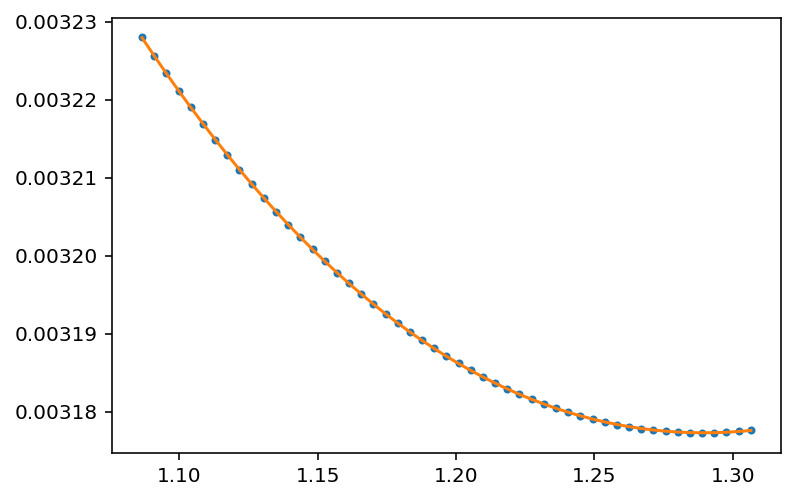

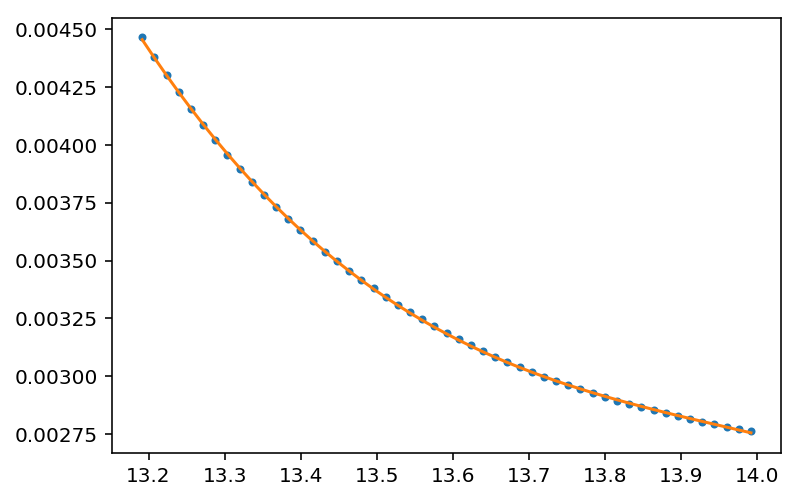

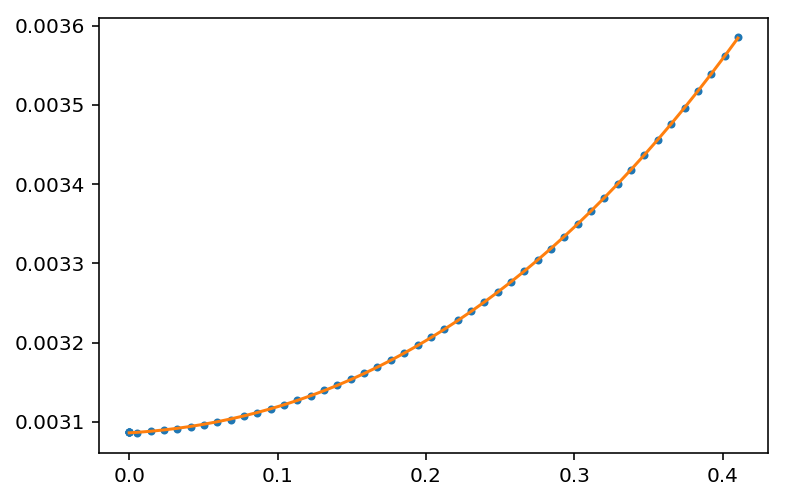

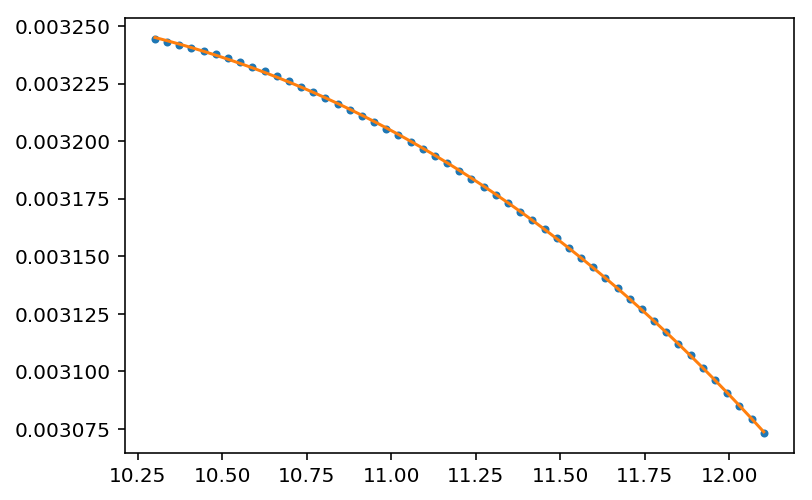

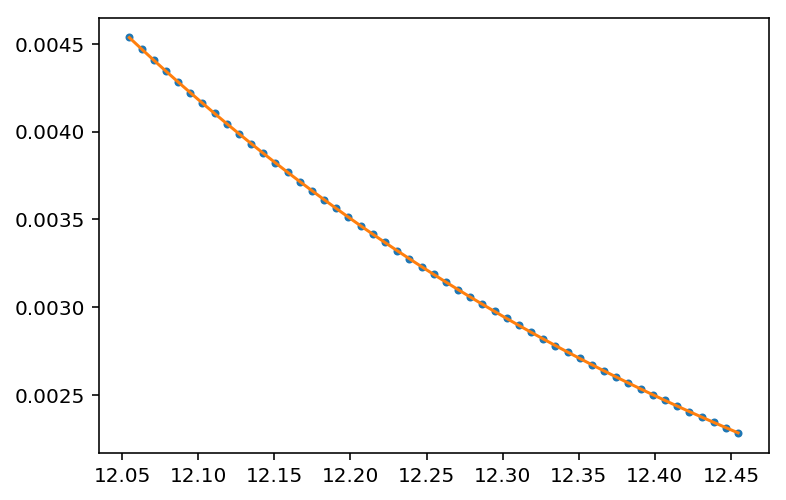

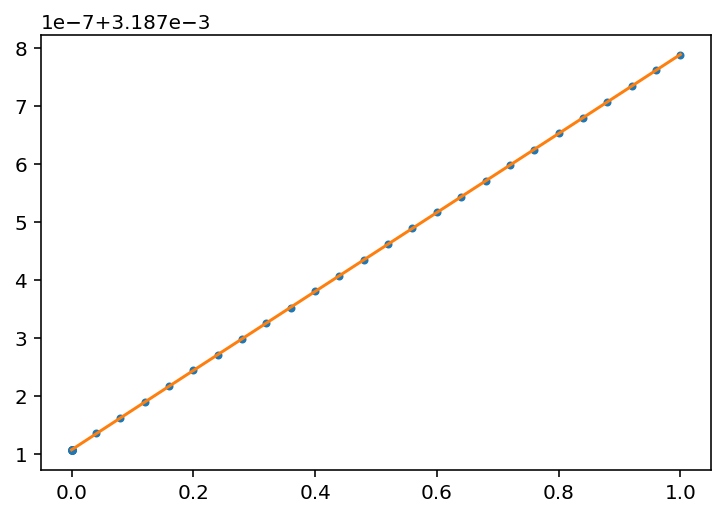

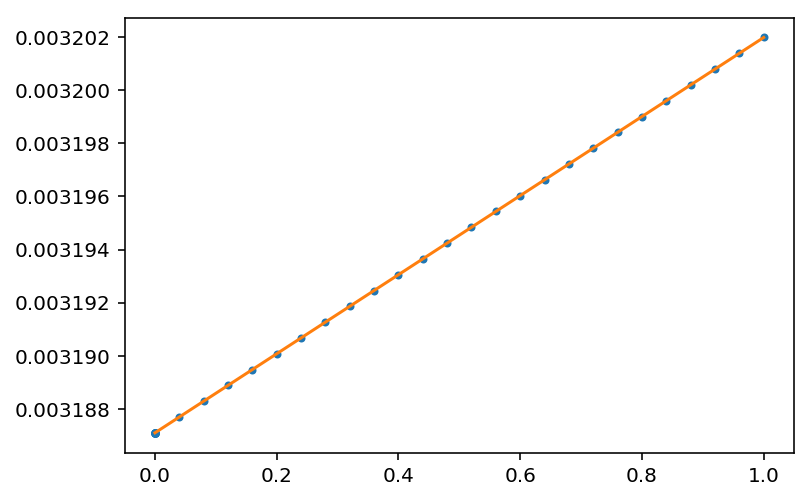

In [28]:
for i in range(7):
    plt.figure()
    plt.plot(p_for_ngal[i],ngal[i],'.')
    a,b,c,d = np.polyfit(p_for_ngal[i],ngal[i],3)
    dngal_dp = 3*a*p0_20p5[i]**2+2*b*p0_20p5[i]+c
    plt.plot(p_for_ngal[i],poly(p_for_ngal[i],a,b,c,d))
    print poly_deriv[i,0,-1],dngal_dp,poly_deriv[i,0,-1]/dngal_dp

In [20]:
def calc_cov(covjk,func_real):
    return np.mean(covjk,axis=0)+np.cov(func_real.T)

In [21]:
def calc_fisher(dfdp, covtot):
    fmatrix = np.zeros((7,7))
    for i in range(7):
        for j in range(7):
            fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covtot),dfdp[j]))
    return fmatrix

In [22]:
def calc_1sigma(fisher):
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [36]:
poly_deriv[5,0,:] = 0

poly_deriv[6,0,:] = 0

In [37]:
fid_20p5 = np.load('Run_040118/bolp_20p5_0.npz')

In [38]:
calc_1sigma(calc_fisher(poly_deriv[:,:,-1],calc_cov(fid_20p5['func_all_cov'],fid_20p5['func_all'])))

array([ 0.03048666,  0.01770095,  0.07920688,  1.24315223,  0.01444199,
        0.34450475,  0.14151145])

In [39]:
one_sigma = np.zeros((50,7))
cov = calc_cov(fid_20p5['func_all_cov'],fid_20p5['func_all'])
for i in range(50):
    print i
    one_sigma[i] = calc_1sigma(calc_fisher(poly_deriv[:,:,i*2+1],cov))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


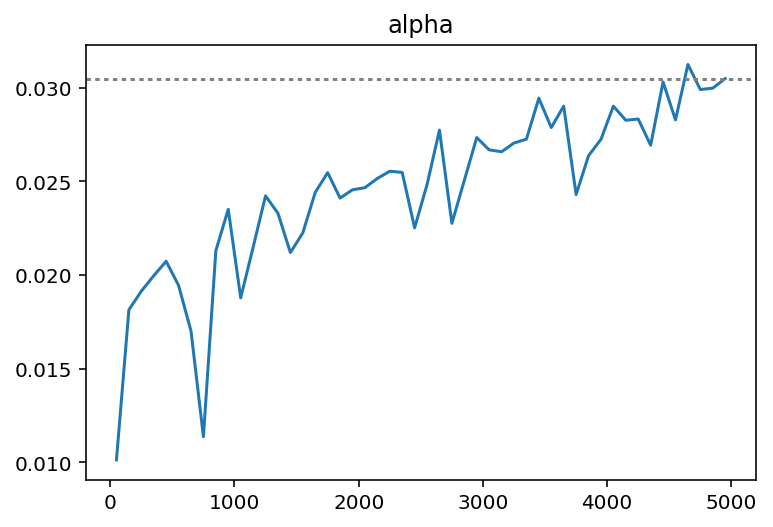

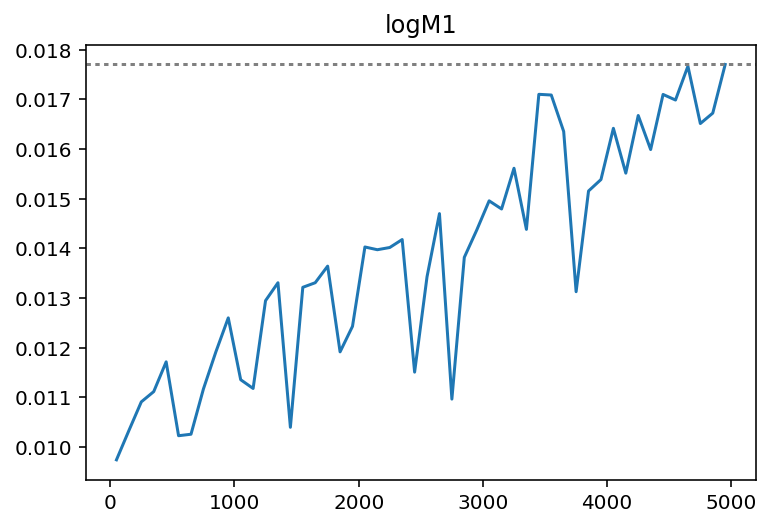

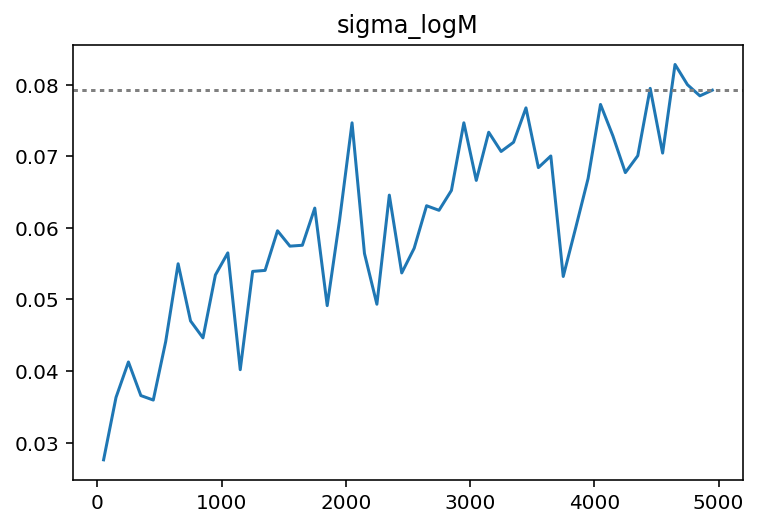

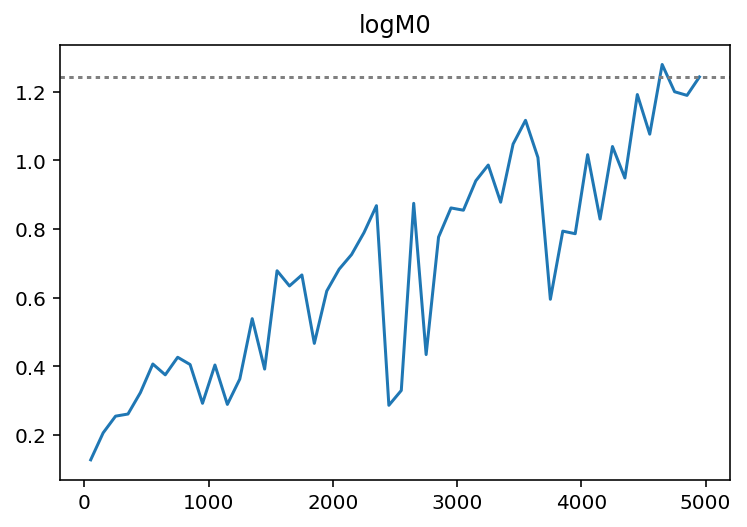

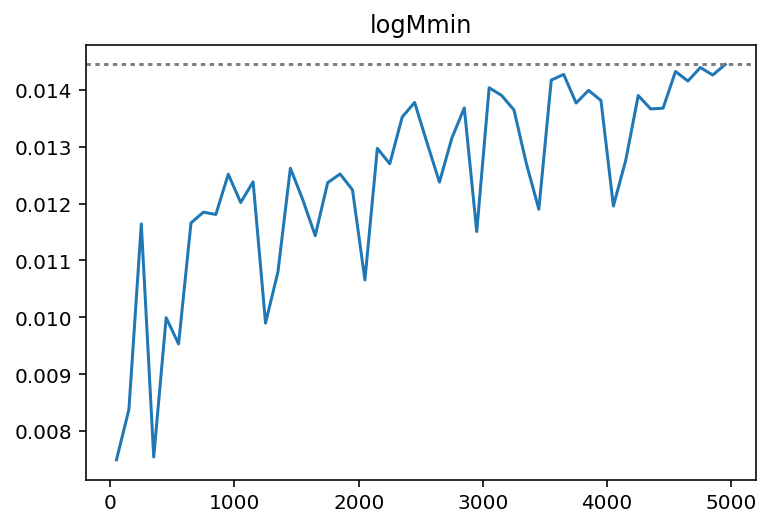

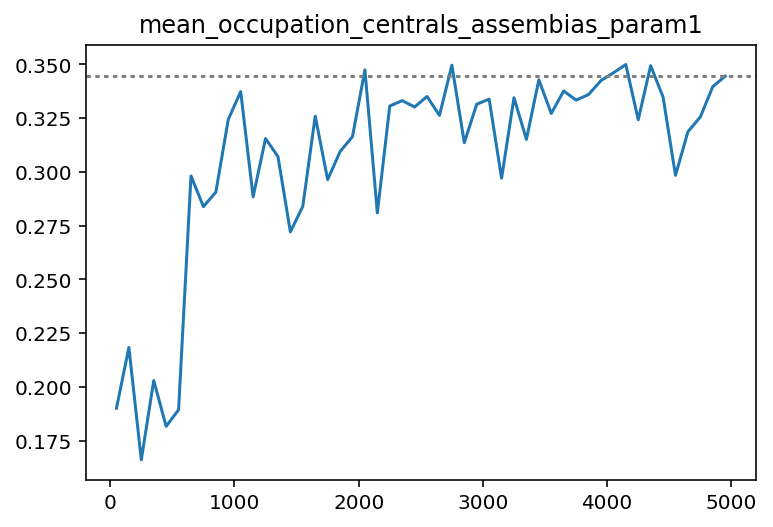

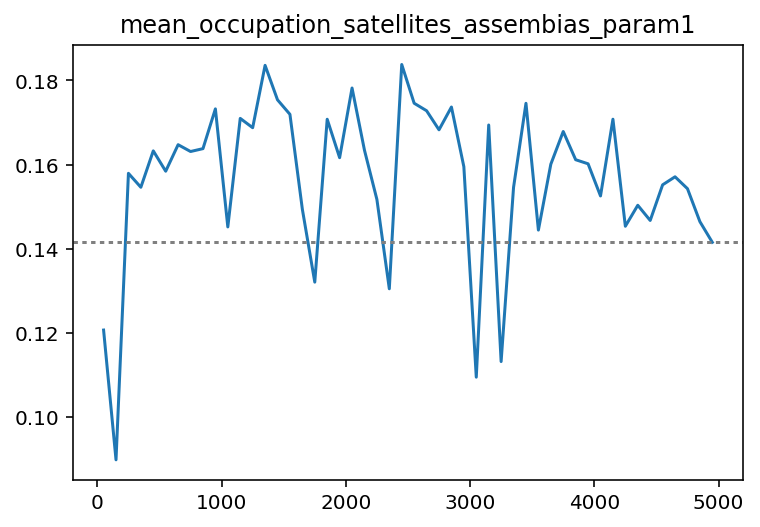

In [40]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma[:,i])
    plt.axhline(one_sigma[-1,i],linestyle=':',color='grey')
    plt.title(param_names[i])

In [41]:
def calc_1sigma_prior(fisher,prior_i,prior_inv_s2):
    for n,i in enumerate(prior_i):
        fisher[i,i] += prior_inv_s2[n]
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [42]:
one_sigma_pp = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp[i] = calc_1sigma_prior(calc_fisher(poly_deriv[:,:,i*2+1],cov),(2,3),(25,100))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


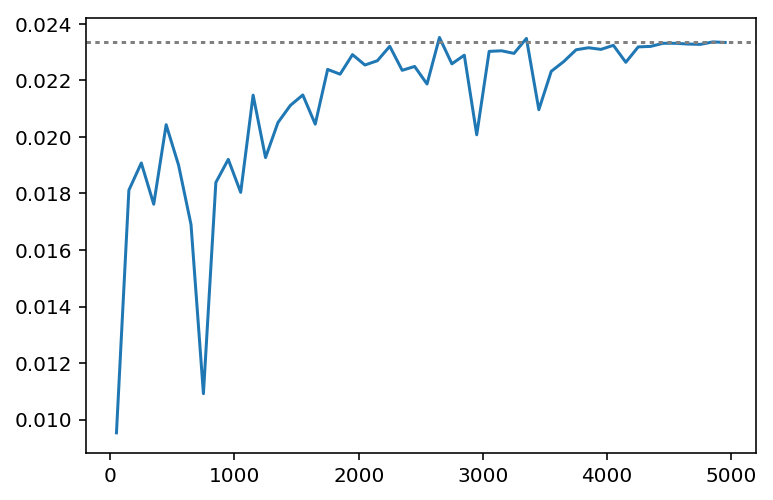

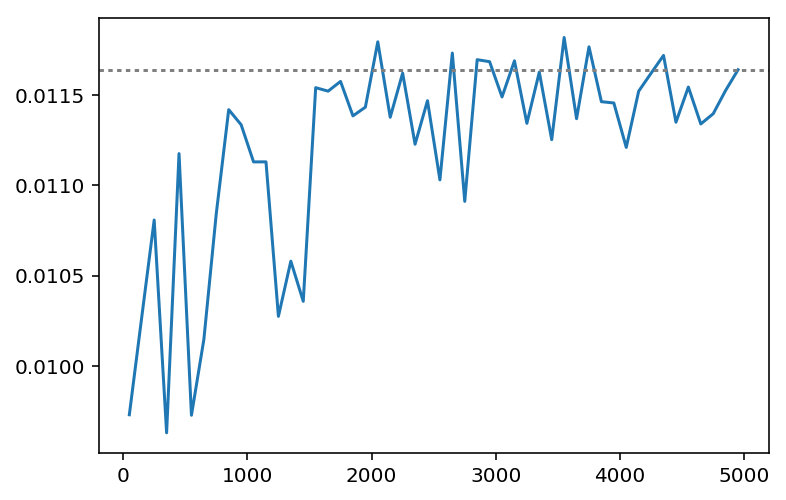

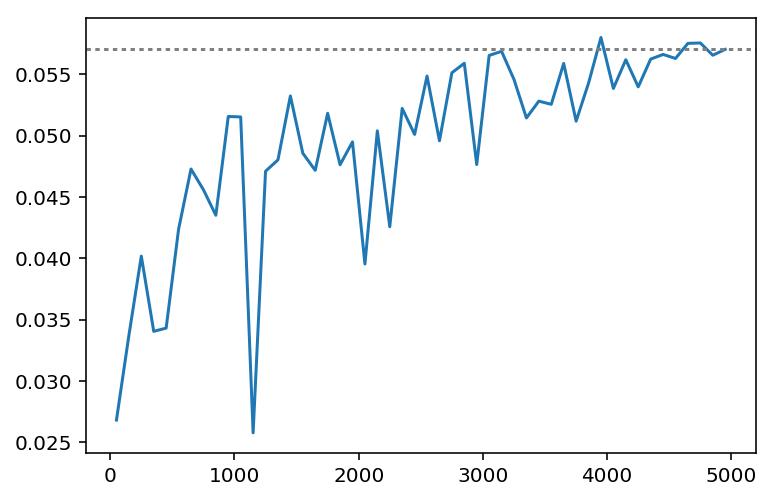

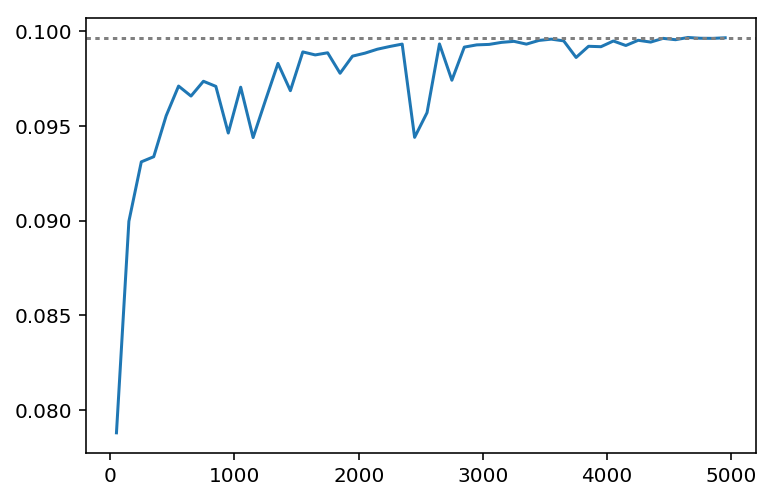

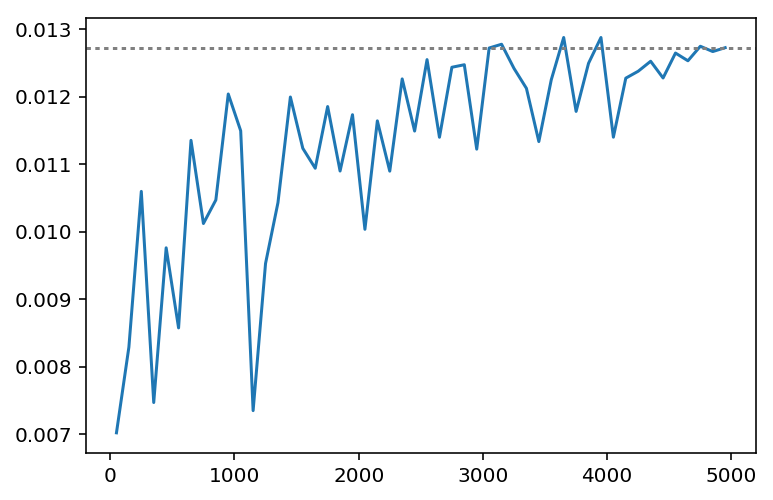

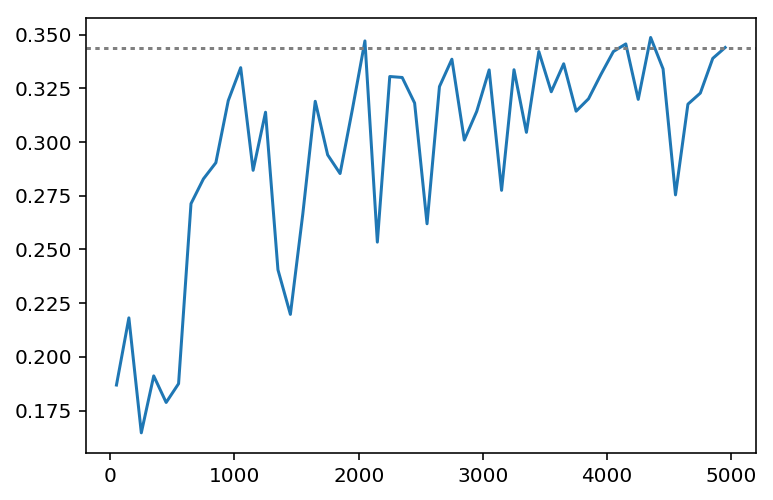

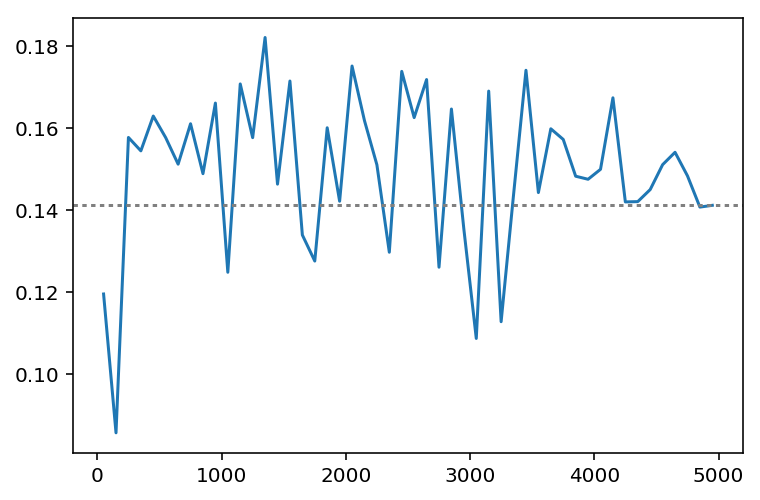

In [43]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_pp[:,i])
    plt.axhline(one_sigma_pp[-1,i],linestyle=':',color='grey')

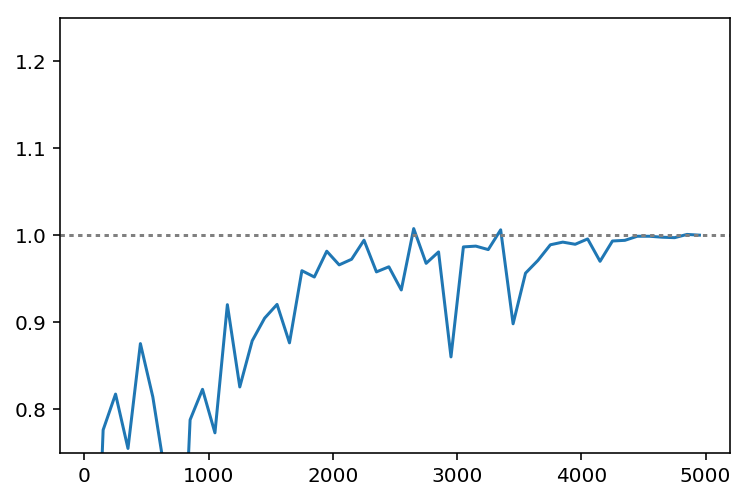

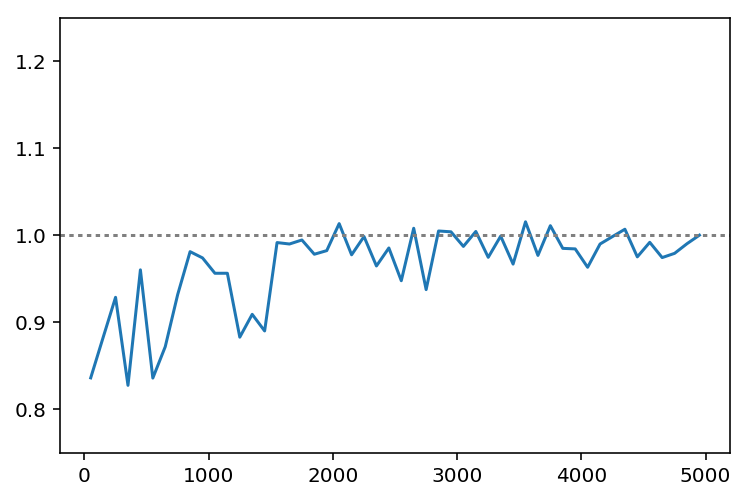

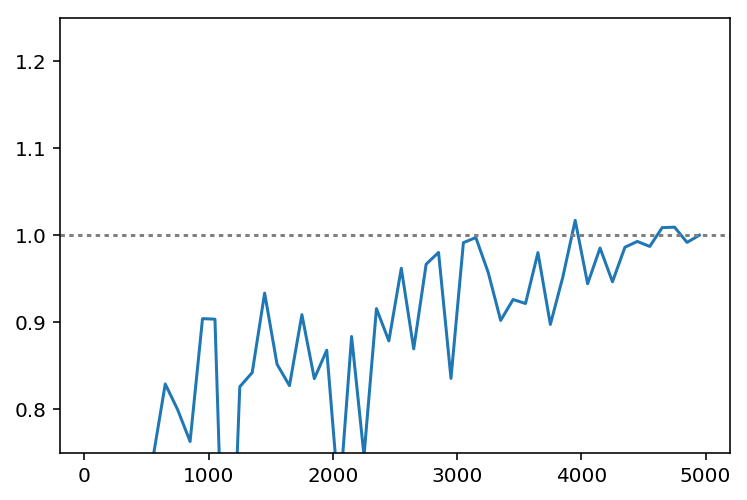

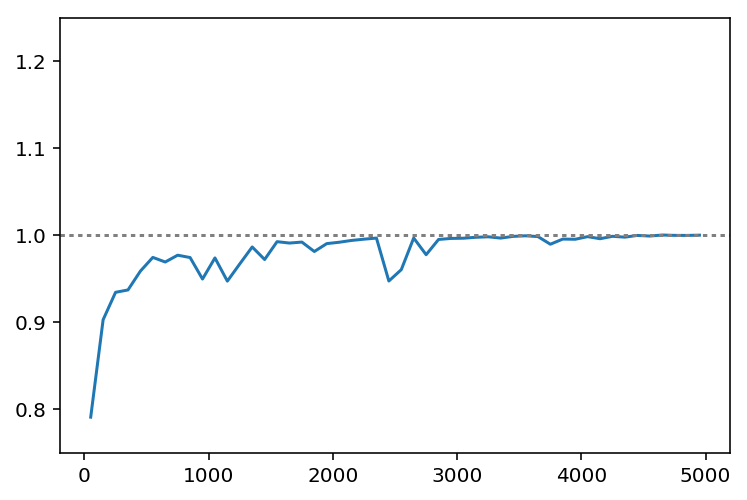

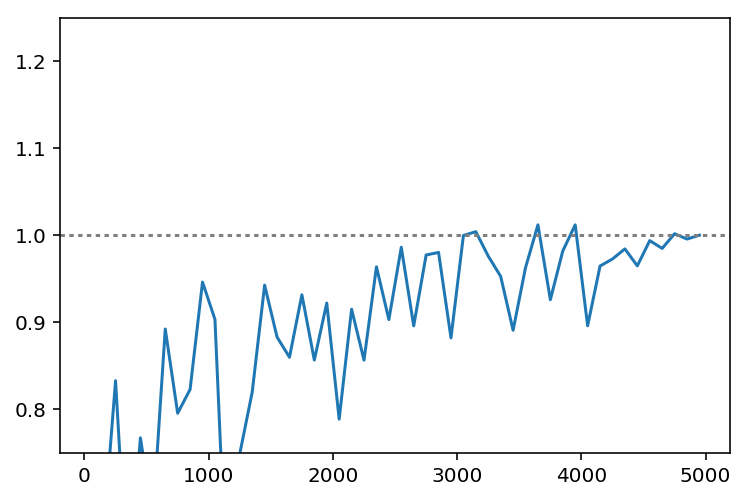

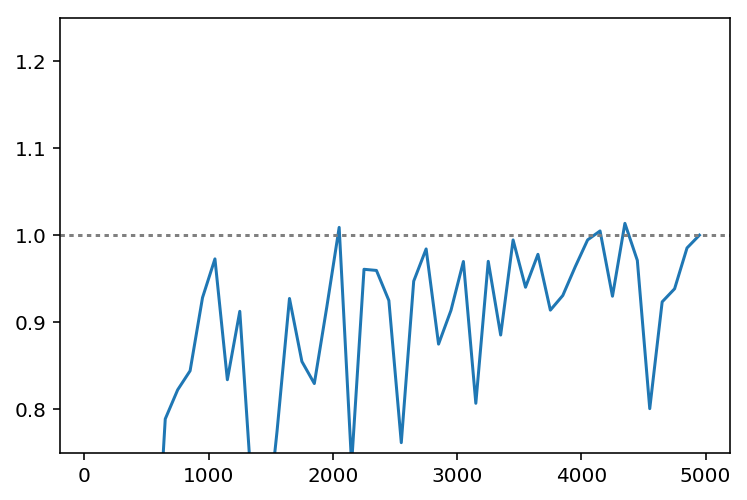

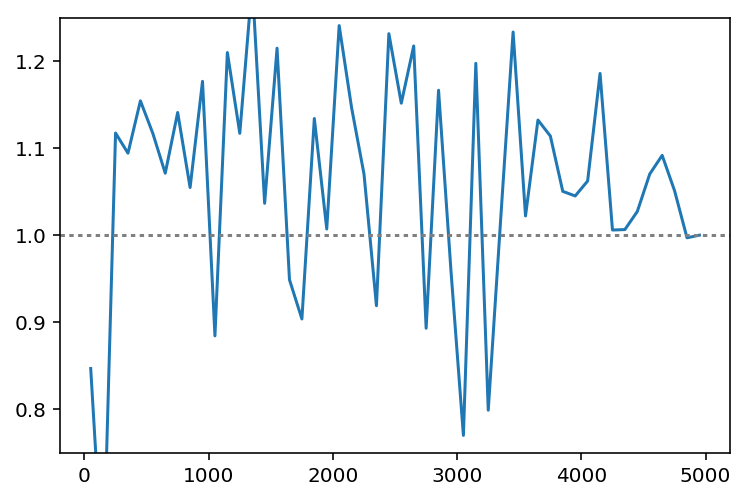

In [44]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_pp[:,i]/one_sigma_pp[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))

## Throwing out bad bins

In [45]:
bin_idx = np.array((0,  1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33,
       34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65,
       68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 92, 94, 95))

In [46]:
calc_1sigma(calc_fisher(poly_deriv[:,bin_idx,-1],calc_cov(fid_21p0['func_all_cov'][:,bin_idx][:,:,bin_idx],fid_21p0['func_all'][:,bin_idx])))

NameError: name 'fid_21p0' is not defined

In [57]:
one_sigma_red = np.zeros((50,7))
cov_red = calc_cov(fid_21p0['func_all_cov'][:,bin_idx][:,:,bin_idx],fid_21p0['func_all'][:,bin_idx])
for i in range(50):
    print i
    one_sigma_red[i] = calc_1sigma(calc_fisher(poly_deriv[:,bin_idx,i*2+1],cov_red))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


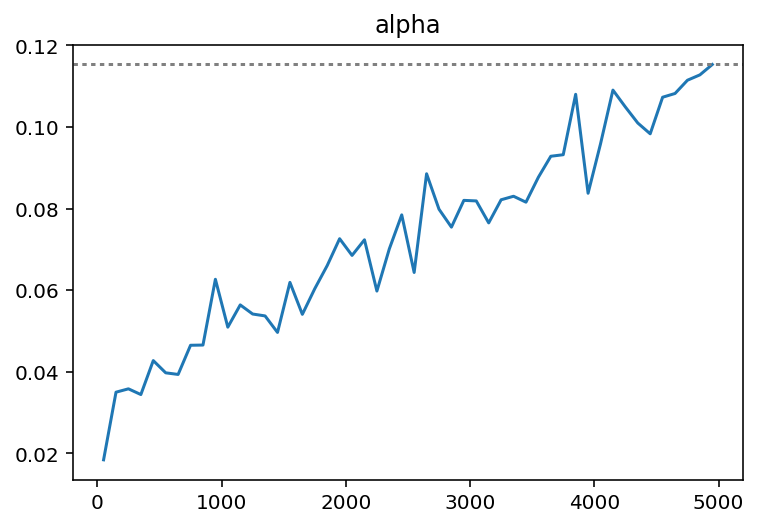

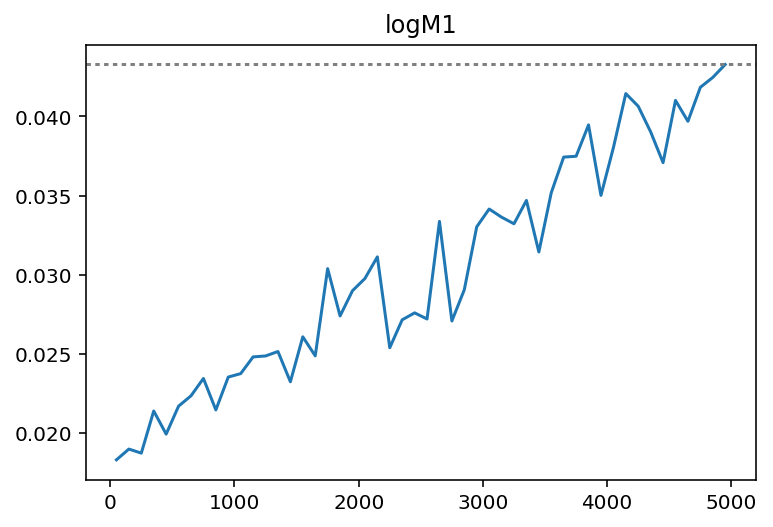

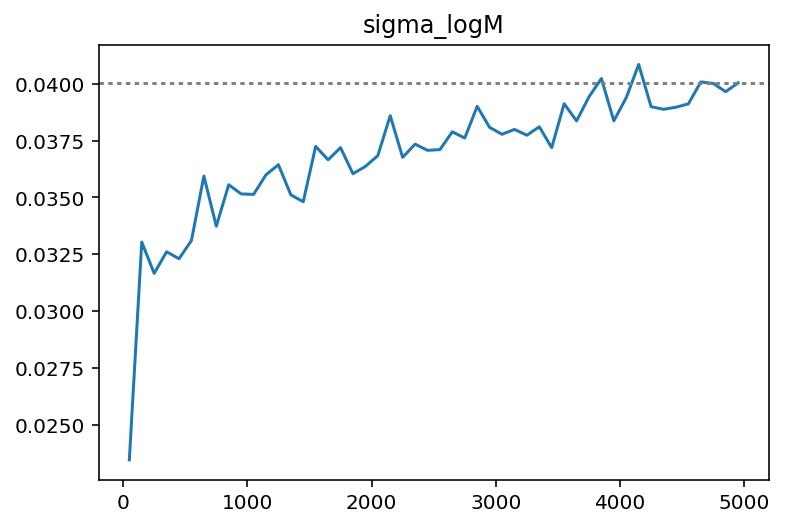

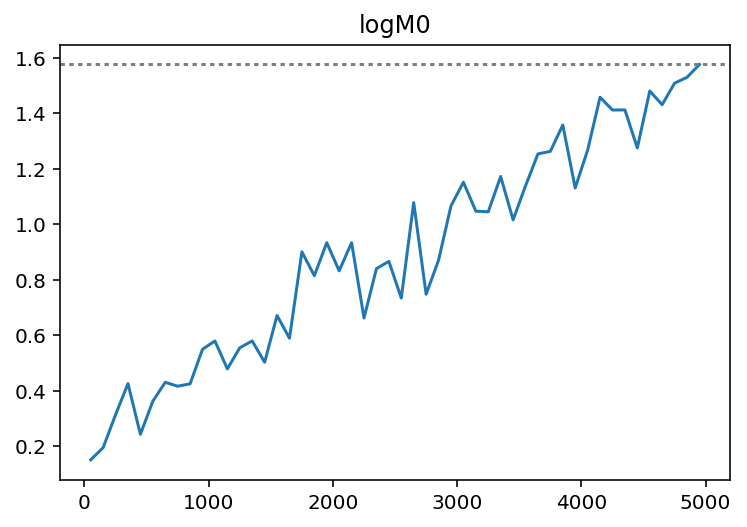

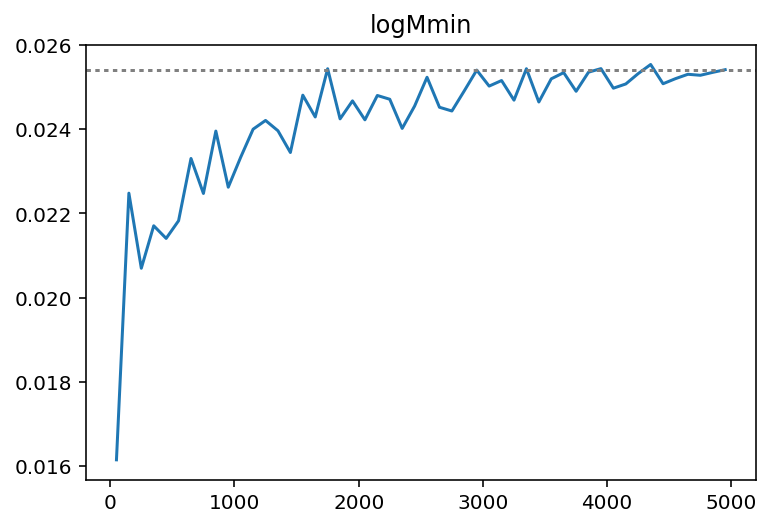

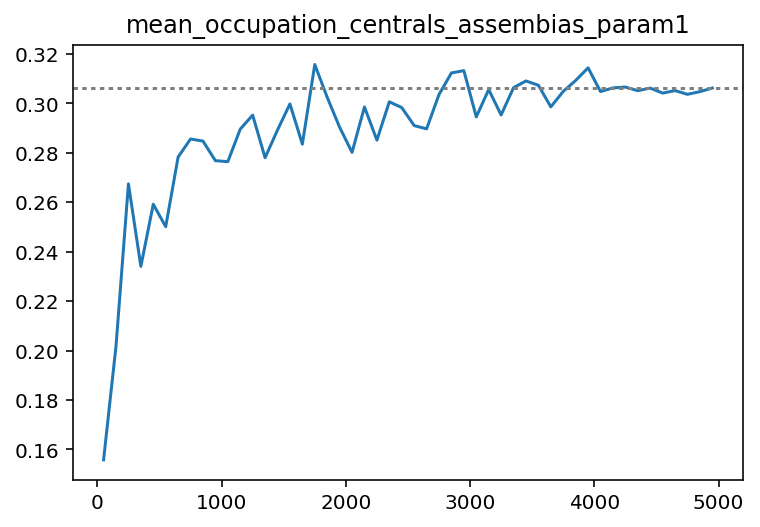

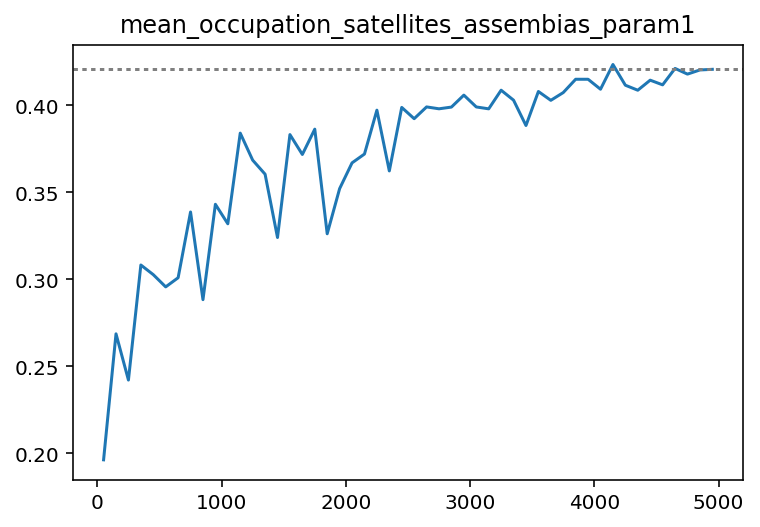

In [61]:
for i in range(7):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_red[:,i])
    plt.axhline(one_sigma_red[-1,i],linestyle=':',color='grey')
    plt.title(param_names[i])

## Fixing M0

In [70]:
def calc_fisher_6(dfdp, covtot):
    fmatrix = np.zeros((6,6))
    for i in range(6):
        for j in range(6):
            fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covtot),dfdp[j]))
    return fmatrix

In [72]:
one_sigma_6 = np.zeros((50,6))
cov = calc_cov(fid_21p0['func_all_cov'][:,:120,:120],fid_21p0['func_all'][:,:120])
for i in range(50):
    print i
    one_sigma_6[i] = calc_1sigma(calc_fisher_6(poly_deriv[:,:,i*2+1],cov))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


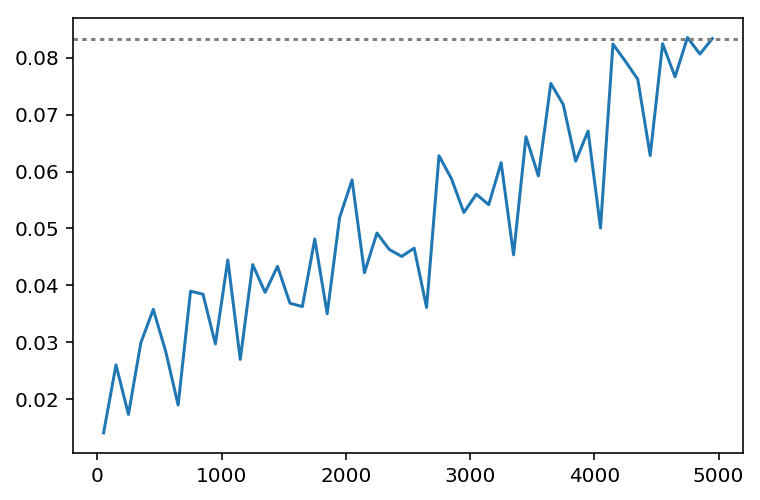

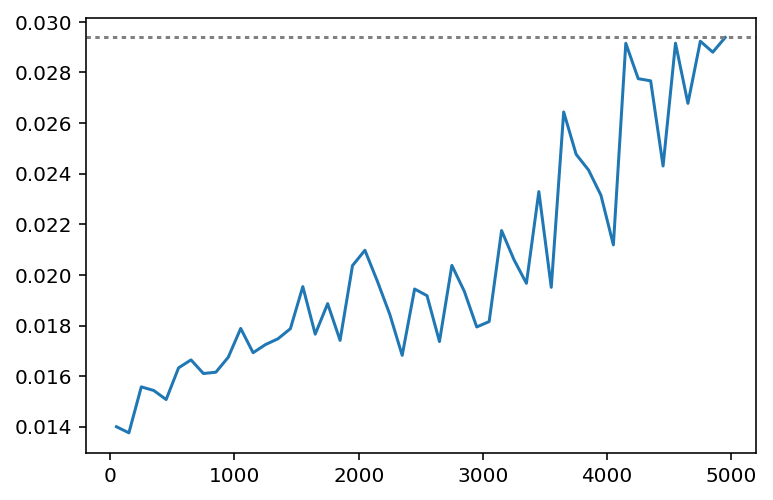

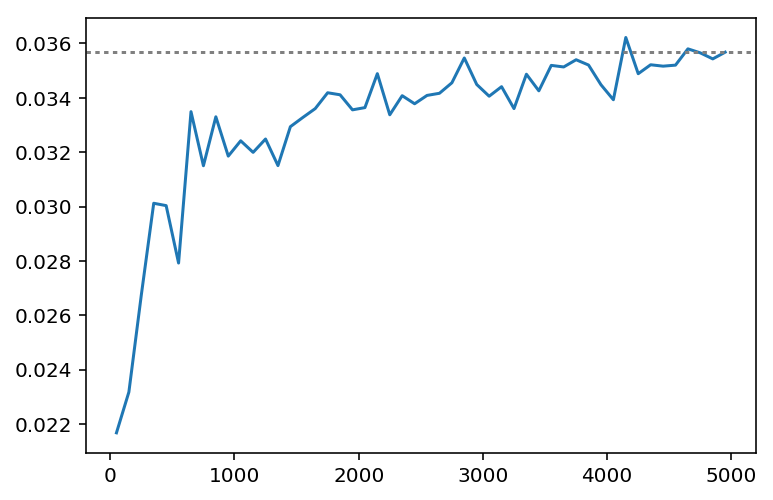

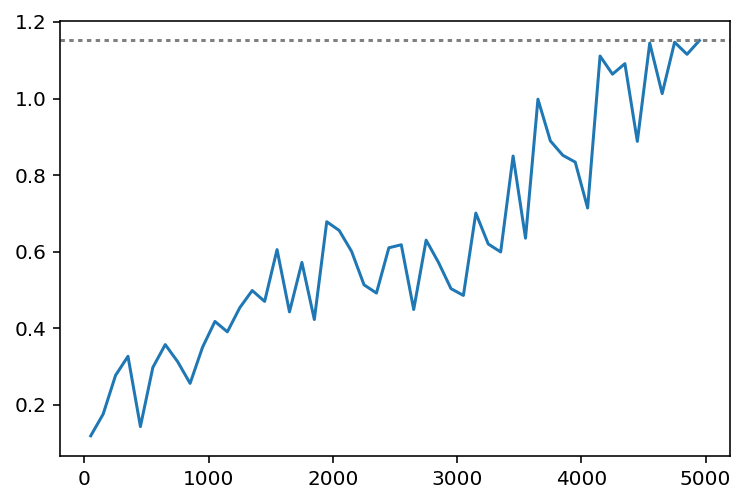

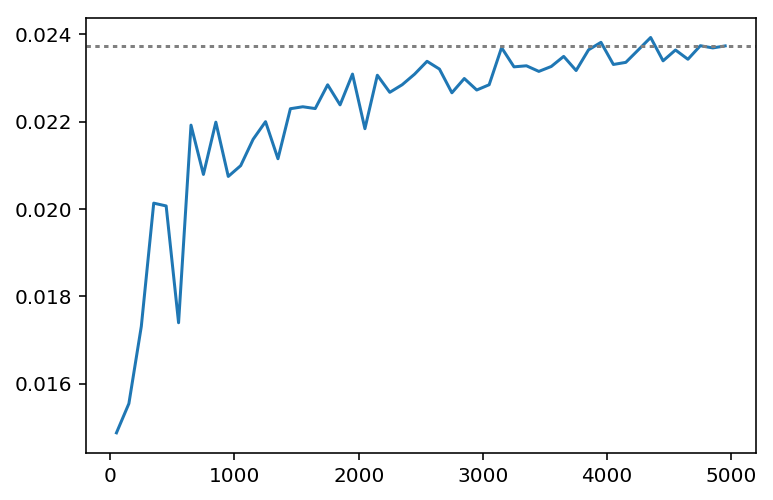

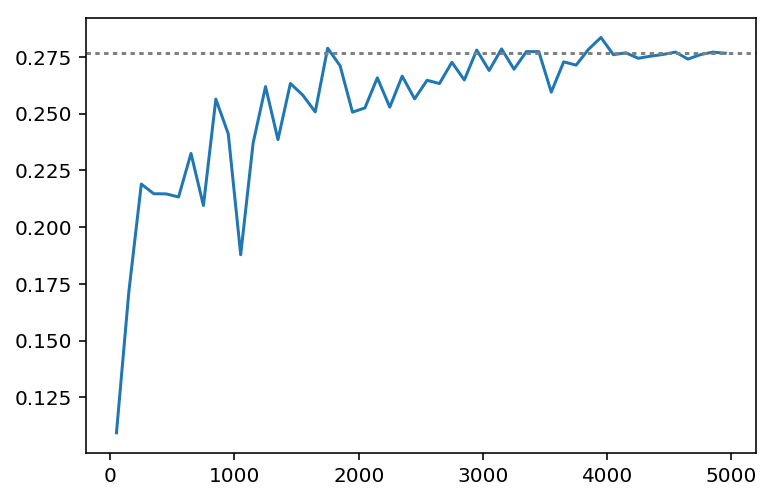

In [87]:
for i in range(6):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_6[:,i])
    plt.axhline(one_sigma_6[-1,i],linestyle=':',color='grey')

## Both

In [80]:
calc_1sigma(calc_fisher_6(poly_deriv[[0,1,2,4,5,6]][:,bin_idx,-1],\
                        calc_cov(fid_21p0['func_all_cov'][:,bin_idx][:,:,bin_idx],fid_21p0['func_all'][:,bin_idx])))

array([ 0.06431907,  0.02081637,  0.03775767,  0.02492284,  0.30400146,
        0.42040647])

In [82]:
one_sigma_red_6 = np.zeros((50,6))
cov_red_6 = calc_cov(fid_21p0['func_all_cov'][:,bin_idx][:,:,bin_idx],fid_21p0['func_all'][:,bin_idx])
for i in range(50):
    print i
    one_sigma_red_6[i] = calc_1sigma(calc_fisher_6(poly_deriv[[0,1,2,4,5,6]][:,bin_idx,i*2+1],cov_red_6))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


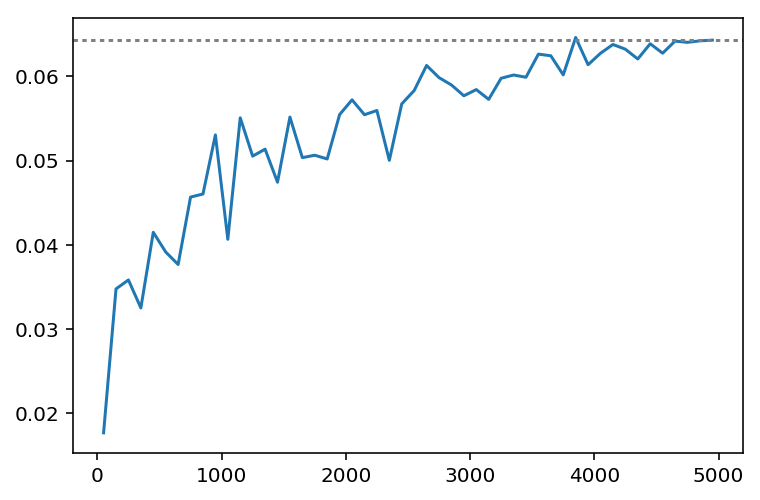

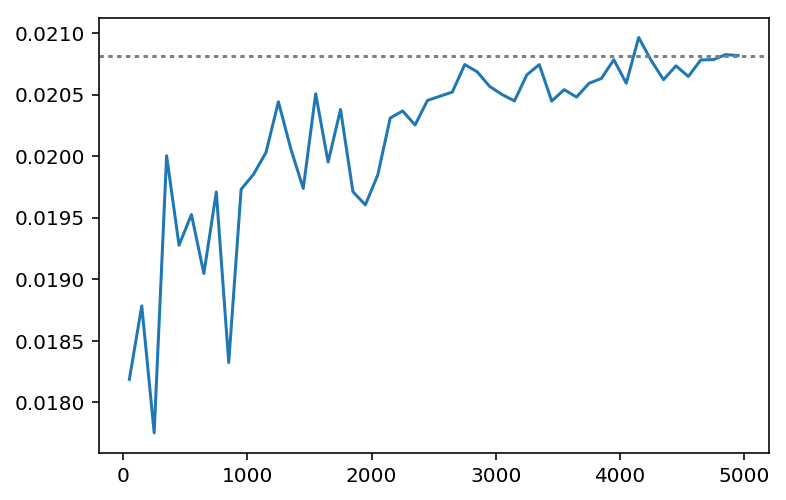

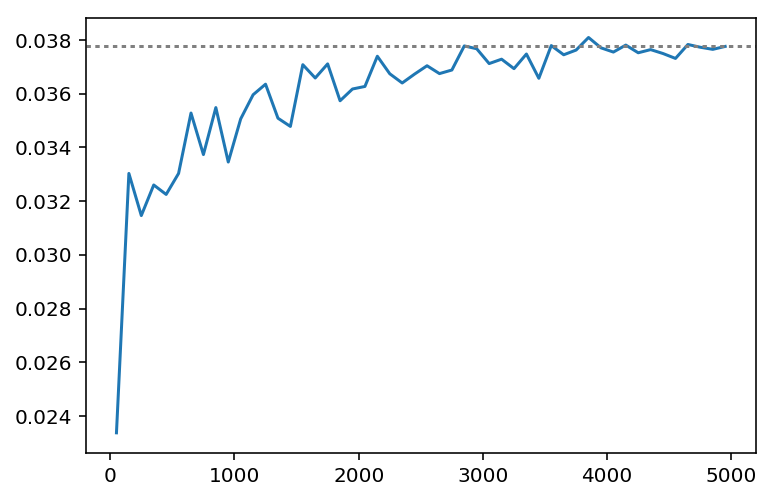

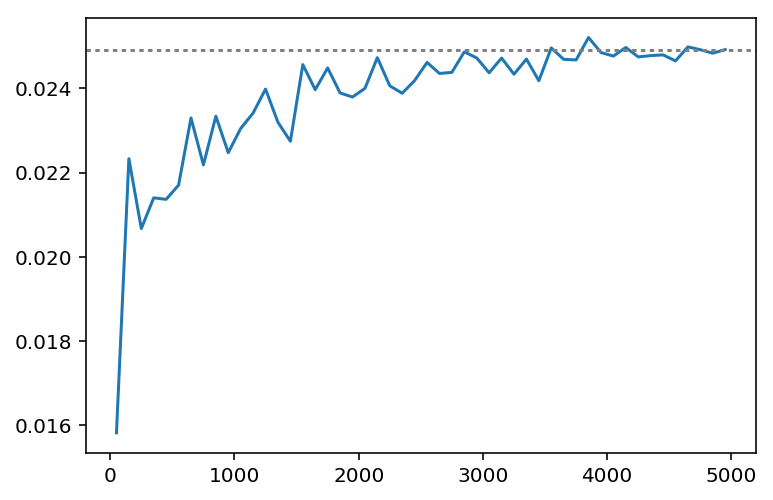

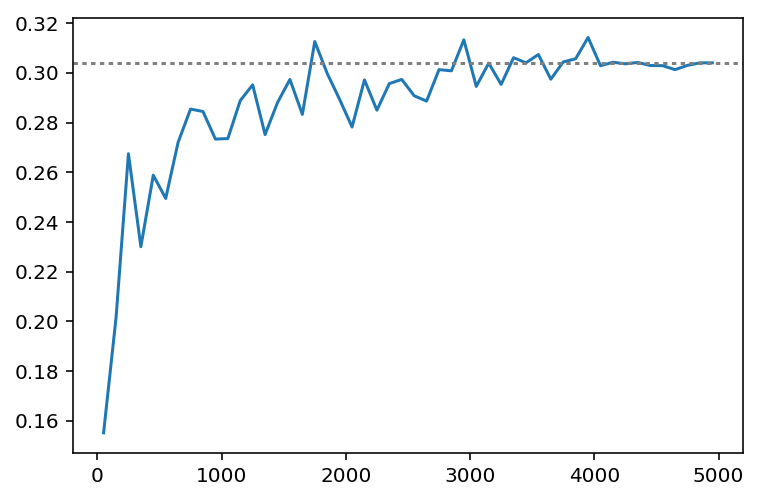

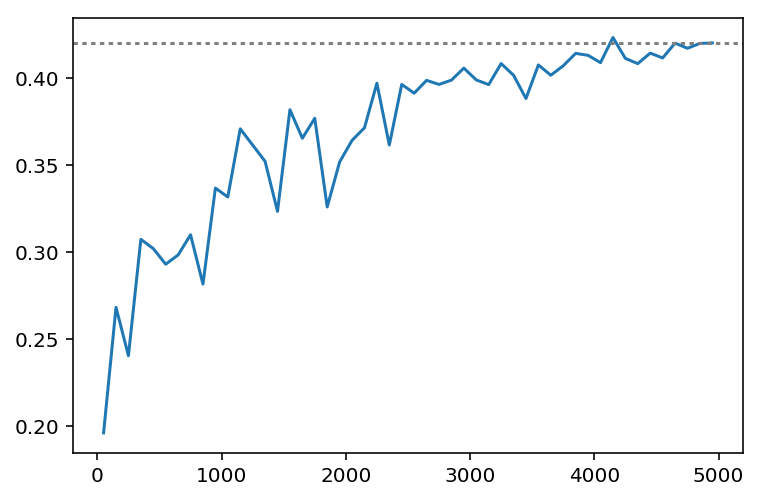

In [86]:
for i in range(6):
    plt.figure()
    plt.plot(np.arange(50)*100+50,one_sigma_red_6[:,i])
    plt.axhline(one_sigma_red_6[-1,i],linestyle=':',color='grey')

In [95]:
icov = np.linalg.inv(cov)

In [100]:
np.where(icov>0.001*np.max(icov))

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  60,  60,  61,  62,  62,  63,  64,
         64,  65,  65,  66,  67,  67,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 108,
        109, 109, 110, 110, 111, 111, 112, 112, 113, 113, 114, 115, 116,
        117, 117, 118, 119, 119]),
 array([  0,  60,  62,  64,  65,  67,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 117, 119,   0,  60,  61,   0,  62,  63,   0,
         64,   0,  65,  66,   0,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 108,
          0, 109,   0, 110,   0, 111,   0, 112,   0, 113, 114, 115, 116,
          0, 117, 118,   0, 119]))

In [97]:
icov

array([[  2.12764351e+10,   2.42144595e+01,  -7.42874456e+00, ...,
          2.62761852e+07,  -1.82984626e+07,   2.98640030e+07],
       [  2.42144595e+01,   7.71458350e-05,  -3.04492358e-06, ...,
         -4.84521264e-01,  -2.73649693e+00,  -8.60290291e-01],
       [ -7.42874456e+00,  -3.04492358e-06,   1.31938194e-04, ...,
         -1.36280983e+00,   6.14573811e-01,   3.39757515e+00],
       ..., 
       [  2.62761852e+07,  -4.84521264e-01,  -1.36280983e+00, ...,
          7.36490433e+07,  -1.10413366e+07,  -2.87134901e+06],
       [ -1.82984626e+07,  -2.73649693e+00,   6.14573811e-01, ...,
         -1.10413366e+07,   8.62005084e+07,  -9.23574644e+06],
       [  2.98640030e+07,  -8.60290291e-01,   3.39757515e+00, ...,
         -2.87134901e+06,  -9.23574644e+06,   8.63763173e+07]])